In [1]:
# Import necessary libraries
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
print(f"Shape of the dataset: {df.shape}")
print("First two entries of the dataset:")
df.head(2)

Shape of the dataset: (200, 5)
First two entries of the dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [3]:
# Check for missing values in the dataset
print("Missing values in each column:")
print(df.isnull().sum())

# Check the data types of each column
print("\nData types of each column:")
print(df.dtypes)

Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data types of each column:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [4]:
# If there are missing values, decide how to handle them (e.g., dropping or filling them)
# For demonstration, let's assume we need to fill missing values for 'Annual Income (k$)'
# We'll use the median value of the column to fill any gaps, as it's robust against outliers

# Fill missing values with the median (if any)
if df['Annual Income (k$)'].isnull().any():
    median_income = df['Annual Income (k$)'].median()
    df['Annual Income (k$)'] = df['Annual Income (k$)'].fillna(median_income)

# After handling missing values, confirm that there are no more missing values
print("Updated missing values in each column:")
print(df.isnull().sum())

Updated missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


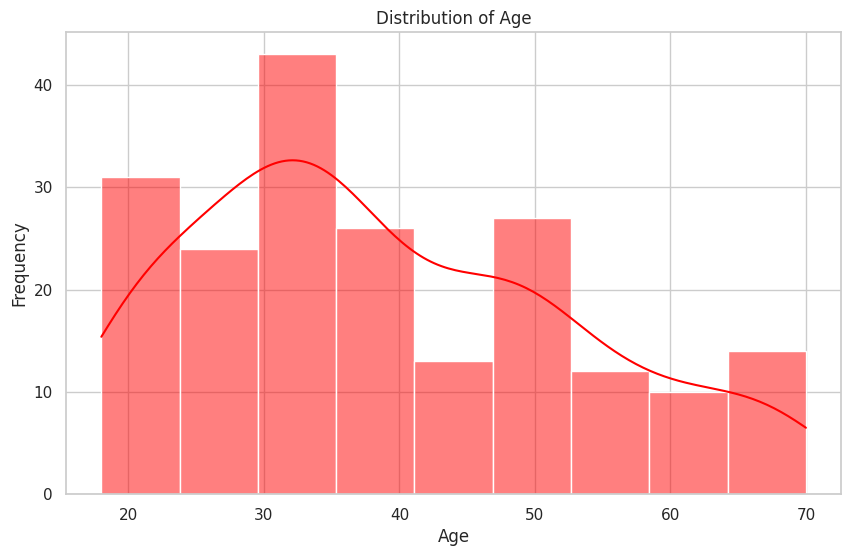

In [6]:
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Plot the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='red')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


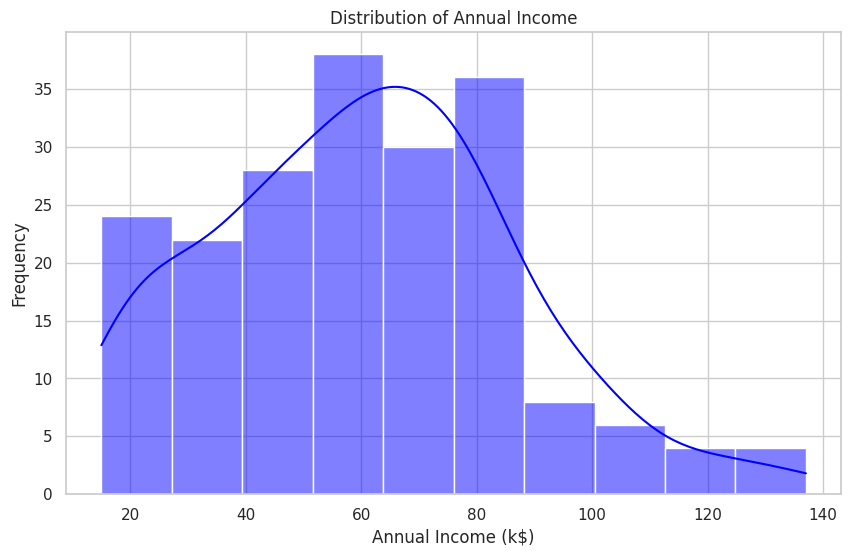

In [7]:
# Plot the distribution of annual income
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], kde=True, color='blue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


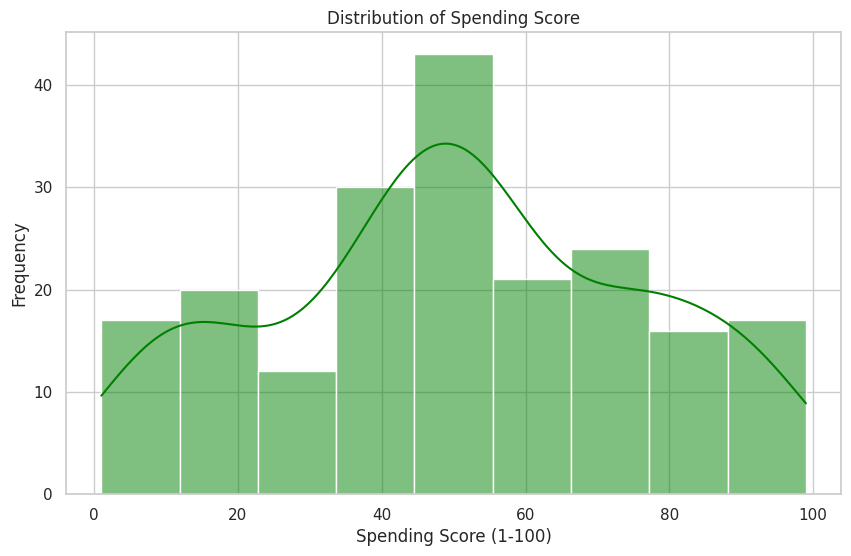

In [8]:
# Plot the distribution of spending score
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], kde=True, color='green')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Importing necessary libraries for scaling and clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [10]:
# Data preparation for scaling
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [11]:
# Determining the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

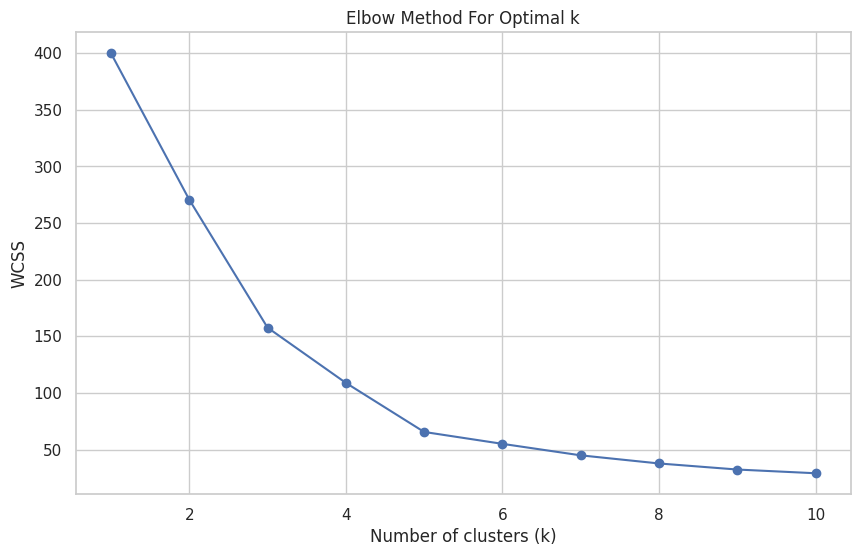

In [12]:
# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Applying k-Means clustering with the optimal number of clusters
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_features)
centroids_annual = scaler.inverse_transform(kmeans.cluster_centers_)

# Adding the cluster labels to our dataframe
df['Cluster'] = cluster_labels

# Displaying the first few entries of the dataframe to inspect the cluster labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


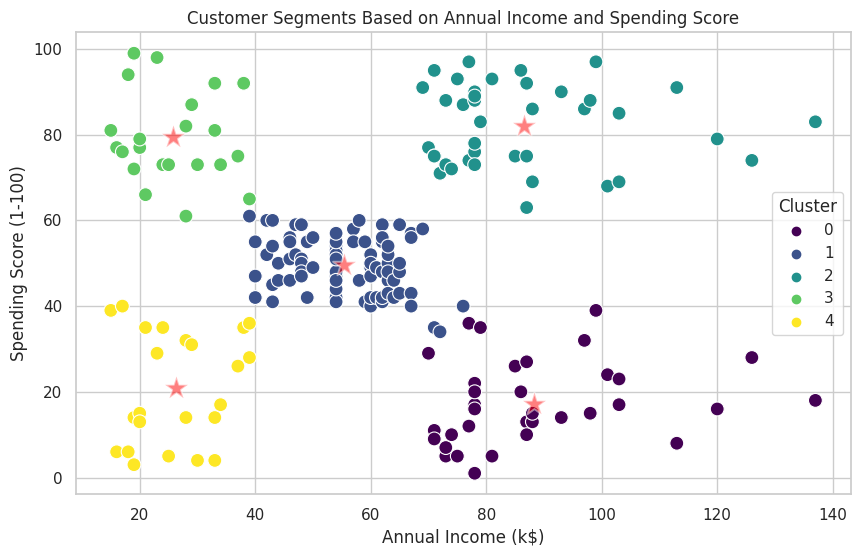

In [14]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
sns.scatterplot(x=centroids_annual[:, 0], y=centroids_annual[:, 1] , s=300 , c='red', alpha=0.5, marker='*')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

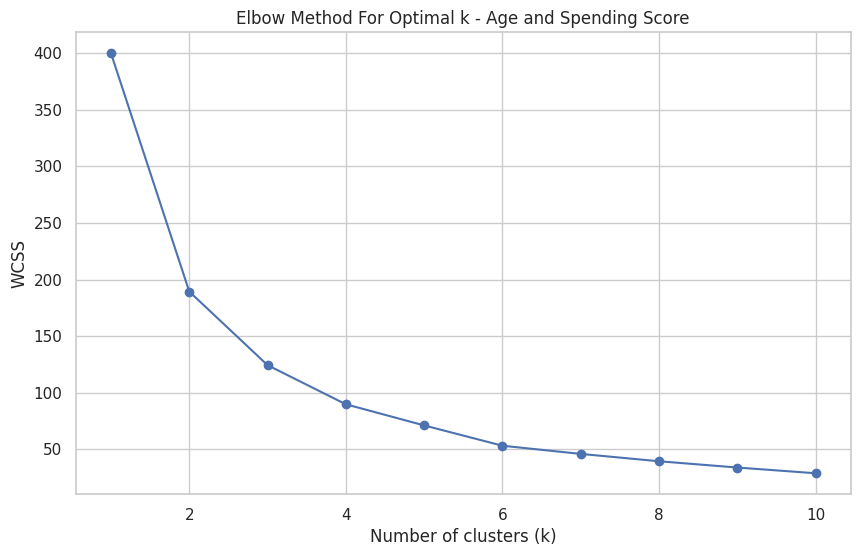

In [15]:
# Data preparation and scaling
features_age_spending = df[['Age', 'Spending Score (1-100)']]
scaler_age_spending = StandardScaler()
scaled_features_age_spending = scaler_age_spending.fit_transform(features_age_spending)

# Determining the optimal number of clusters using the elbow method
wcss_age_spending = []
for i in range(1, 11):
    kmeans_age_spending = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_age_spending.fit(scaled_features_age_spending)
    wcss_age_spending.append(kmeans_age_spending.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_age_spending, marker='o')
plt.title('Elbow Method For Optimal k - Age and Spending Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

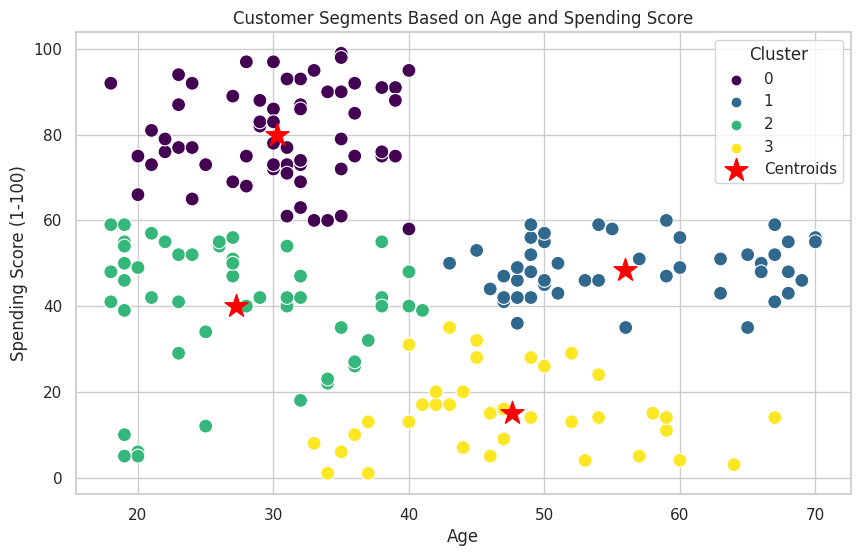

In [16]:
# Applying k-Means clustering with the determined number of clusters
optimal_clusters_age_spending = 4
kmeans_age_spending = KMeans(n_clusters=optimal_clusters_age_spending, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels_age_spending = kmeans_age_spending.fit_predict(scaled_features_age_spending)

# Adding the cluster labels to our dataframe
df['Cluster_Age_Spending'] = cluster_labels_age_spending
centroids_age_spending = scaler_age_spending.inverse_transform(kmeans_age_spending.cluster_centers_)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster_Age_Spending', data=df, palette='viridis', s=100)
plt.scatter(centroids_age_spending[:, 0], centroids_age_spending[:, 1], s=300, c='red', label='Centroids', marker='*')
plt.title('Customer Segments Based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

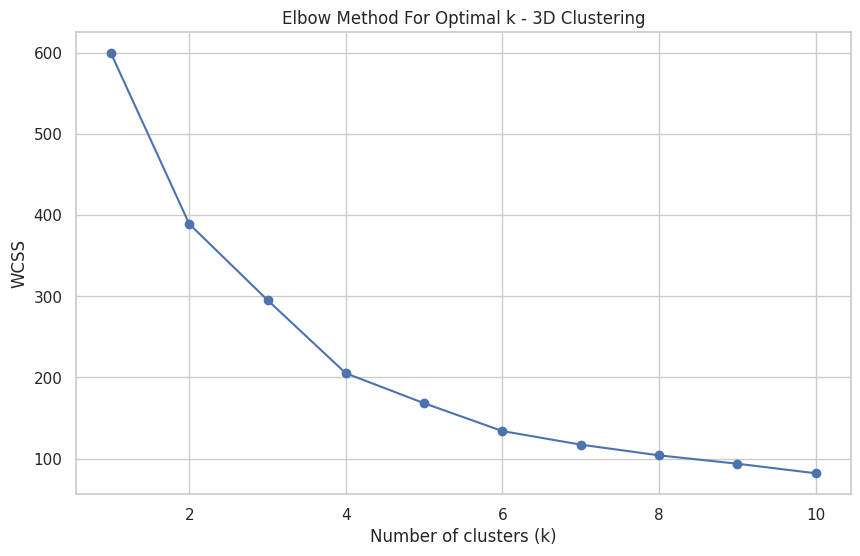

In [17]:
# Scaling the data for Age, Annual Income, and Spending Score
from sklearn.preprocessing import StandardScaler
features_3d = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler_3d = StandardScaler()
scaled_features_3d = scaler_3d.fit_transform(features_3d)

# Determining the optimal number of clusters using the elbow method
wcss_3d = []
for i in range(1, 11):
    kmeans_3d = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_3d.fit(scaled_features_3d)
    wcss_3d.append(kmeans_3d.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_3d, marker='o')
plt.title('Elbow Method For Optimal k - 3D Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [18]:
import plotly.graph_objects as go

# Applying k-Means clustering with k=4
optimal_clusters_3d = 4
kmeans_3d = KMeans(n_clusters=optimal_clusters_3d, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels_3d = kmeans_3d.fit_predict(scaled_features_3d)

# Adding the cluster labels to our dataframe
df['Cluster_3D'] = cluster_labels_3d

# Inverse transforming the centroids to their original scale
centroids_3d = scaler_3d.inverse_transform(kmeans_3d.cluster_centers_)

# Creating the figure
fig = go.Figure()

# Adding clusters to the figure
for cluster in range(optimal_clusters_3d):
    cluster_data = df[df['Cluster_3D'] == cluster]
    fig.add_trace(go.Scatter3d(x=cluster_data['Age'], y=cluster_data['Annual Income (k$)'], 
                               z=cluster_data['Spending Score (1-100)'],
                               mode='markers',
                               name=cluster,
                               marker=dict(size=5)))

# Adding centroids to the figure (but not to the legend)
fig.add_trace(go.Scatter3d(x=centroids_3d[:, 0], y=centroids_3d[:, 1], z=centroids_3d[:, 2],
                           mode='markers', marker=dict(size=10, color='yellow', symbol='x'),
                           showlegend=False))

# Updating the layout
fig.update_layout(scene=dict(
                    xaxis_title='Age',
                    yaxis_title='Annual Income (k$)',
                    zaxis_title='Spending Score (1-100)'),
                  height=800,
                  width=1000,
                  title='3D Customer Segmentation with k=4')

# Show the plot
fig.show()